# 주성분 분석 실습


In [40]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use("ggplot")
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [41]:
### 9-1-3 PCA 실습
seed = 0
np.random.seed(seed)
n = 1000
mu = [8, 3]
sigma = [[0.7, 0.3], [0.2, 0.2]]
x = np.random.multivariate_normal(mu, sigma, n)
x.shape

C:\Users\jjjeo\AppData\Local\Temp\ipykernel_1844\3393211974.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  x = np.random.multivariate_normal(mu, sigma, n)


(1000, 2)

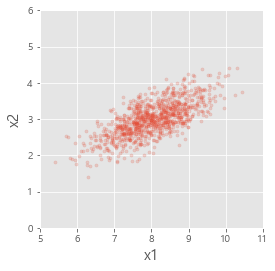

In [94]:
# x의 산점도
plt.figure(figsize = (4, 4))
plt.scatter(x[:, 0], x[:, 1], s=10, alpha = 0.2)
plt.xlabel('x1', fontsize = 15)
plt.ylabel('x2', fontsize = 15)
plt.xlim(5,11)
plt.ylim(0,6)
plt.show()
plt.close()

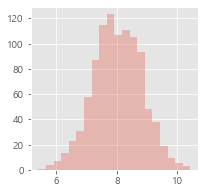

In [96]:
# histogram
plt.figure(figsize = (3, 3))
plt.hist(x[:, 0], bins = 20, alpha=0.3)
plt.show() ; plt.close()

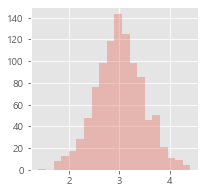

In [97]:
plt.figure(figsize = (3, 3))
plt.hist(x[:, 1], bins = 20, alpha=0.3)
plt.show(); plt.close()

먼저 2차원 자료를 PCA로 분석합니다. 자료의 차원이 2기 때문에 주성분 2개로 자료를 완벽하게 복원할 수 있습니다. 주성분을 먼저 살펴보겠습니다.

아래 코드에서 eivenvector와 eigenvalue를 확인합니다.

In [72]:
# pca함수를 이용한 분석
pca = PCA(n_components = 2)
pca.fit(x)
# eigenvalue
eigenvalue = pca.explained_variance_
print("eigenvalue:\n", eigenvalue)
# eigenvector
eigenvector = pca.components_.transpose()
print("eigenvector:\n", eigenvector)

eigenvalue:
 [0.76633166 0.09569923]
eigenvector:
 [[-0.8988528   0.43825066]
 [-0.43825066 -0.8988528 ]]


eigenvector는 각각 $e_1 = [-0.89,-0.43]$, $e_2=[0.43,-0.89]$입니다. 이 방향이 PC1, PC2방향입니다.

PC1, PC2 방향의 자료에 대한 설명력은 eigenvector값을 확인하면 됩니다.
$\lambda_1 = 0.76$, $\lambda_2 = 0.09$ 입니다. 

주성분과 eigenvector의 의미를 시각화하여 봅시다. 이를 위해서는 먼저 자료를 평균에 대해 표준화해야 합니다. 주성분은 평균에 대한 분석이 아니라 관계(공분산, 상관계수)에 대한 분석임을 다시 한번 상기해봅시다. 아래 코드에서 data의 평균을 0으로 만든 centered_x 변수를 만듭니다.

In [63]:
# 직접 pc score 구하기 위해 x를 centering
m = x.mean(axis = 0)
centered_x = x-m
print('column mean of (x1, x2):\n', m)

column mean of (x1, x2):
 [8.01894326 3.00564362]


In [77]:
pc1 = eigenvector[:,0]*eigenvalue[0]
pc2 = eigenvector[:,1]*eigenvalue[1]
print("PC1:\n", pc1)
print("PC2:\n", pc2)

PC1:
 [-0.68881936 -0.33584535]
PC2:
 [ 0.04194025 -0.08601952]


다음 centered_x 와 이미 우리가 구한 주성분을 표시해봅니다. 주성분은 $\lambda_1 e_1$, $\lambda_2 e_2$를 화살표로 표시합니다. 

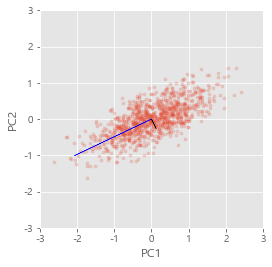

In [98]:
# centering된 데이터의 산점도와 eigenvector 방향 그림
scale_f = 3
plt.figure(figsize = (4, 4))
plt.scatter(centered_x[:, 0], centered_x[:, 1], s = 10, alpha = 0.2)
plt.arrow(0, 0, scale_f*pc1[0], scale_f*pc1[1], color = 'blue')
plt.arrow(0, 0, scale_f*pc2[0], scale_f*pc2[1], color = 'black')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show() ; plt.close()

In [27]:
# pc score
pc_score = pca.transform(x)

In [30]:
# 직접 pc score 구하기 위해 x를 centering
centered_x = np.zeros_like(x)
for i in range(x.shape[1]):
    centered_x[:, i] = x[:, i] - np.mean(x[:, i])
pc_score2 = centered_x @ eigenvector
print("pc score obtained by package\n", pc_score[:5])
print("pc score obtained by manual code\n", pc_score2[: 5])

pc score obtained by package
 [[ 1.60280573 -0.13817921]
 [ 0.89437943 -0.71400939]
 [ 1.69818766  0.29516332]
 [ 0.87289152  0.03964757]
 [-0.07391121 -0.13203839]]
pc score obtained by manual code
 [[ 1.60280573 -0.13817921]
 [ 0.89437943 -0.71400939]
 [ 1.69818766  0.29516332]
 [ 0.87289152  0.03964757]
 [-0.07391121 -0.13203839]]


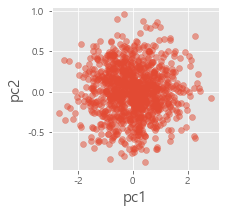

In [31]:
# pc score 산점도
plt.figure(figsize = (3, 3))
plt.scatter(pc_score[:, 0], pc_score[:, 1], alpha = 0.5)
plt.xlabel('pc1', fontsize = 15)
plt.ylabel('pc2', fontsize = 15)
plt.show(); plt.close()

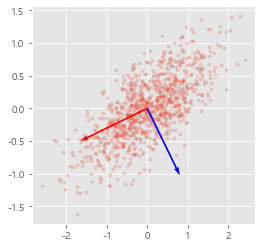

In [34]:
# centering된 데이터의 산점도와 eigenvector 방향 그림
plt.figure(figsize = (4, 4))
plt.scatter(centered_x[:, 0], centered_x[:, 1], s = 10, alpha = 0.2)
# plt.quiver([0,0], [0,0], [1,0], [1,-1])인 경우 [0,0]->[1,1]방향, [0,0]->[0,-1]방향을 가르킴
plt.quiver([0, 0], [0, 0], eigenvector[0], eigenvector[1], color = ['red', 'blue'], scale = 3)
plt.show() ; plt.close()

In [ ]:

# numpy로 pc score 구하기
data = x
data -= np.mean(data, axis = 0)
cov = np.cov(data ,rowvar = False)

eigval, eigvec = np.linalg.eigh(cov)

print(f'eigenvalues using scikit-learn: {eigenvalue},\
      \neigenvalues using numpy: {eigval}')
print(f'eigenvvectors using scikit-learn: \n{eigenvector},\
      \neigenvvectors using numpy: \n{eigvec}')

Text(0, 0.5, 'x2')

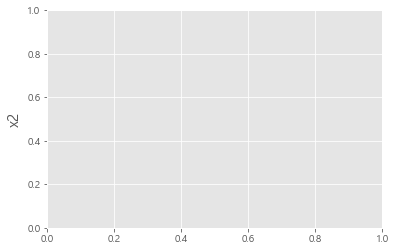

In [17]:
plt.ylabel('x2', fontsize = 15)

In [ ]:

# histogram
plt.figure(figsize = (8, 8))
plt.hist(x[:, 0], bins = 20)
plt.show()
plt.close()

plt.figure(figsize = (8, 8))
plt.hist(x[:, 1], bins = 20)
plt.show()
plt.close()

# pca함수를 이용해 pc score 계산
pca = PCA(n_components = 2)
pca.fit(x)

# eigenvalue
eigenvalue = pca.explained_variance_

# eigenvector
eigenvector = pca.components_.transpose()

# pc score
pc_score = pca.transform(x)

# 직접 pc score 구하기 위해 x를 centering
centered_x = np.zeros_like(x)
for i in range(x.shape[1]):
    centered_x[:, i] = x[:, i] - np.mean(x[:, i])

pc_score2 = centered_x @ eigenvector

pc_score[:5]
pc_score2[: 5]

# pc score 산점도
plt.figure(figsize = (8, 8))
plt.scatter(pc_score[:, 0], pc_score[:, 1], alpha = 0.5)
plt.xlabel('pc1', fontsize = 15)
plt.ylabel('pc2', fontsize = 15)
plt.show()
plt.close()

# centering된 데이터의 산점도와 eigenvector 방향 그림
plt.figure(figsize = (8, 8))
plt.scatter(centered_x[:, 0], centered_x[:, 1], alpha = 0.5)
# plt.quiver([0,0], [0,0], [1,0], [1,-1])인 경우 [0,0]->[1,1]방향, [0,0]->[0,-1]방향을 가르킴
plt.quiver([0, 0], [0, 0], eigenvector[0], eigenvector[1], color = ['red', 'blue'], scale = 3)
plt.show()
plt.close()

# numpy로 pc score 구하기
data = x
data -= np.mean(data, axis = 0)
cov = np.cov(data ,rowvar = False)

eigval, eigvec = np.linalg.eigh(cov)

print(f'eigenvalues using scikit-learn: {eigenvalue},\
      \neigenvalues using numpy: {eigval}')
print(f'eigenvvectors using scikit-learn: \n{eigenvector},\
      \neigenvvectors using numpy: \n{eigvec}')